# Mutual Information for Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

In [2]:
data=pd.read_csv("train.csv",nrows=50000)


In [3]:
data.shape

(50000, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
numerics=['int16','int32','int64','float16','float32','float64']
numerical_vars=list(data.select_dtypes(include=numerics).columns)
data=data[numerical_vars]
data.shape

(50000, 114)

In [6]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['target','ID'],axis=1),data['target'],
                                              test_size=0.3,
                                              random_state=0)

In [9]:
(X_train.shape,y_train.shape)

((35000, 112), (35000,))

In [10]:
(X_test.shape,y_test.shape)

((15000, 112), (15000,))

### We will use mutual_info_classif and SelectKBest from sklearn

In [11]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest

In [12]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.00051189, 0.006933  , 0.0029261 , 0.00101156, 0.00457939,
       0.00678621, 0.0057411 , 0.00332764, 0.02554987, 0.00225943,
       0.01727257, 0.0053913 , 0.02302923, 0.00614788, 0.00611832,
       0.00385995, 0.0017655 , 0.00390366, 0.00280918, 0.01168993,
       0.        , 0.00569355, 0.00188458, 0.00298116, 0.00404895,
       0.00529572, 0.00281004, 0.00529019, 0.00848974, 0.00465618,
       0.00311646, 0.00365436, 0.00483043, 0.00327553, 0.00716314,
       0.00601138, 0.0057673 , 0.00563521, 0.00490248, 0.00357382,
       0.00658412, 0.00298154, 0.00453217, 0.03905266, 0.00729799,
       0.00219352, 0.00520128, 0.00318835, 0.0043105 , 0.00225316,
       0.0049949 , 0.00525956, 0.00264514, 0.01532596, 0.00325597,
       0.00449673, 0.00491185, 0.00513955, 0.0027651 , 0.00531642,
       0.00371631, 0.00543753, 0.00725631, 0.00603143, 0.00468056,
       0.00208074, 0.00279669, 0.00180657, 0.00739854, 0.00303668,
       0.00583576, 0.00618096, 0.00529366, 0.        , 0.00452

In [13]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039053
v10     0.025550
v14     0.023029
v12     0.017273
v62     0.015326
v129    0.013112
v21     0.011690
v114    0.009933
v100    0.008998
v101    0.008967
v123    0.008612
v34     0.008490
v119    0.008104
v106    0.007787
v82     0.007399
v51     0.007298
v73     0.007256
v40     0.007163
v103    0.007097
v2      0.006933
v7      0.006786
v93     0.006660
v127    0.006586
v46     0.006584
v128    0.006411
v85     0.006181
v15     0.006148
v16     0.006118
v76     0.006031
v41     0.006011
          ...   
v48     0.002982
v27     0.002981
v4      0.002926
v130    0.002839
v32     0.002810
v20     0.002809
v94     0.002805
v80     0.002797
v68     0.002765
v61     0.002645
v111    0.002564
v97     0.002392
v11     0.002259
v58     0.002253
v53     0.002194
v78     0.002081
v109    0.002028
v124    0.001951
v26     0.001885
v81     0.001807
v18     0.001765
v108    0.001049
v5      0.001012
v121    0.000676
v1      0.000512
v115    0.000000
v102    0.000000
v23     0.0000

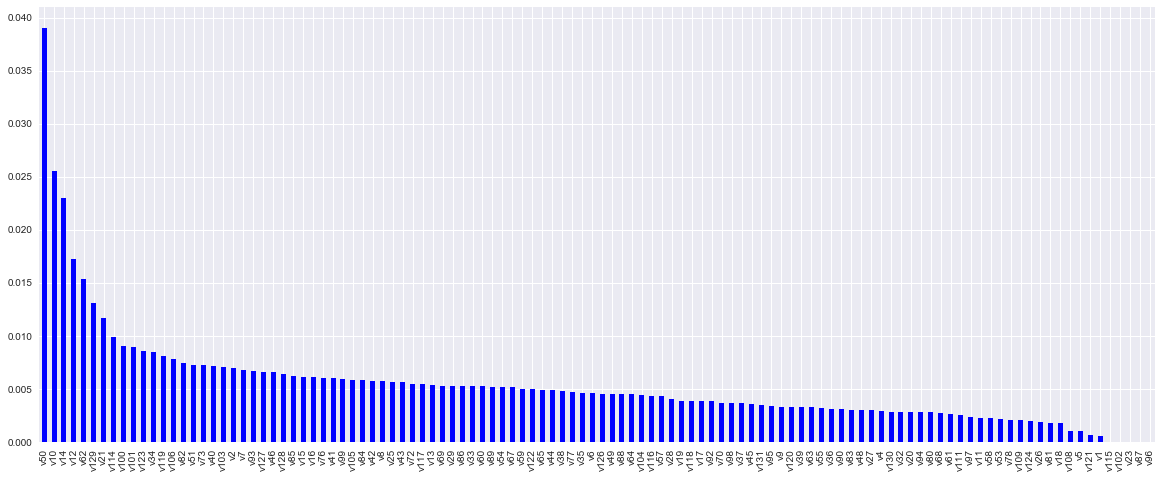

In [14]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='blue')

So we can choose like top n values based on problem or top 10 percentile values. Here let us select top 10 values

In [15]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v50', 'v51', 'v62', 'v114', 'v118',
       'v129'],
      dtype='object')